In [ ]:
pip install ucimlrepo

In [69]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import itertools

In [ ]:
bone_marrow_transplant_children = fetch_ucirepo(id=565)


X = bone_marrow_transplant_children.data.features
y = bone_marrow_transplant_children.data.targets


print(bone_marrow_transplant_children.metadata)

print(bone_marrow_transplant_children.variables)


{'uci_id': 565, 'name': 'Bone marrow transplant: children', 'repository_url': 'https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children', 'data_url': 'https://archive.ics.uci.edu/static/public/565/data.csv', 'abstract': 'The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 187, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Gender', 'Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5NP6Z', 'creators': ['Marek Sikora', 'Łukasz Wróbel', 'Adam Gudyś'], 'intro_paper': {'ID': 293, 'type': 'NATIVE', 'title': 'GuideR: a guided se

#**DATASET OVERVIEW**

In [ ]:
# Merge features + target for easier EDA
df = pd.concat([X, y], axis=1)

In [ ]:
# Basic overview
print("Shape:", df.shape)

Shape: (187, 37)


In [ ]:
print("\nInfo:\n")
df.info()


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse  

In [ ]:
print("\nSummary stats:\n", df.describe(include="all"))


Summary stats:
         Recipientgender  Stemcellsource    Donorage  Donorage35        IIIV  \
count        187.000000      187.000000  187.000000  187.000000  187.000000   
unique              NaN             NaN         NaN         NaN         NaN   
top                 NaN             NaN         NaN         NaN         NaN   
freq                NaN             NaN         NaN         NaN         NaN   
mean           0.598930        0.775401   33.472068    0.443850    0.598930   
std            0.491431        0.418438    8.271826    0.498171    0.491431   
min            0.000000        0.000000   18.646575    0.000000    0.000000   
25%            0.000000        1.000000   27.039726    0.000000    0.000000   
50%            1.000000        1.000000   33.550685    0.000000    1.000000   
75%            1.000000        1.000000   40.117809    1.000000    1.000000   
max            1.000000        1.000000   55.553425    1.000000    1.000000   

        Gendermatch    DonorABO  R

#**DISTRIBUTIONS AND VISUALIZATIONS**

In [ ]:
# Numeric feature distributions
numeric_features = [
    "Donorage",
    "Recipientage",
    "Rbodymass",
    "CD34kgx10d6",
    "CD3dkgx10d8",
    "CD3dCD34","survival_time"
]
# "ANCrecovery","PLTrecovery","time_to_aGvHD_III_IV"
df_numeric = df[numeric_features]

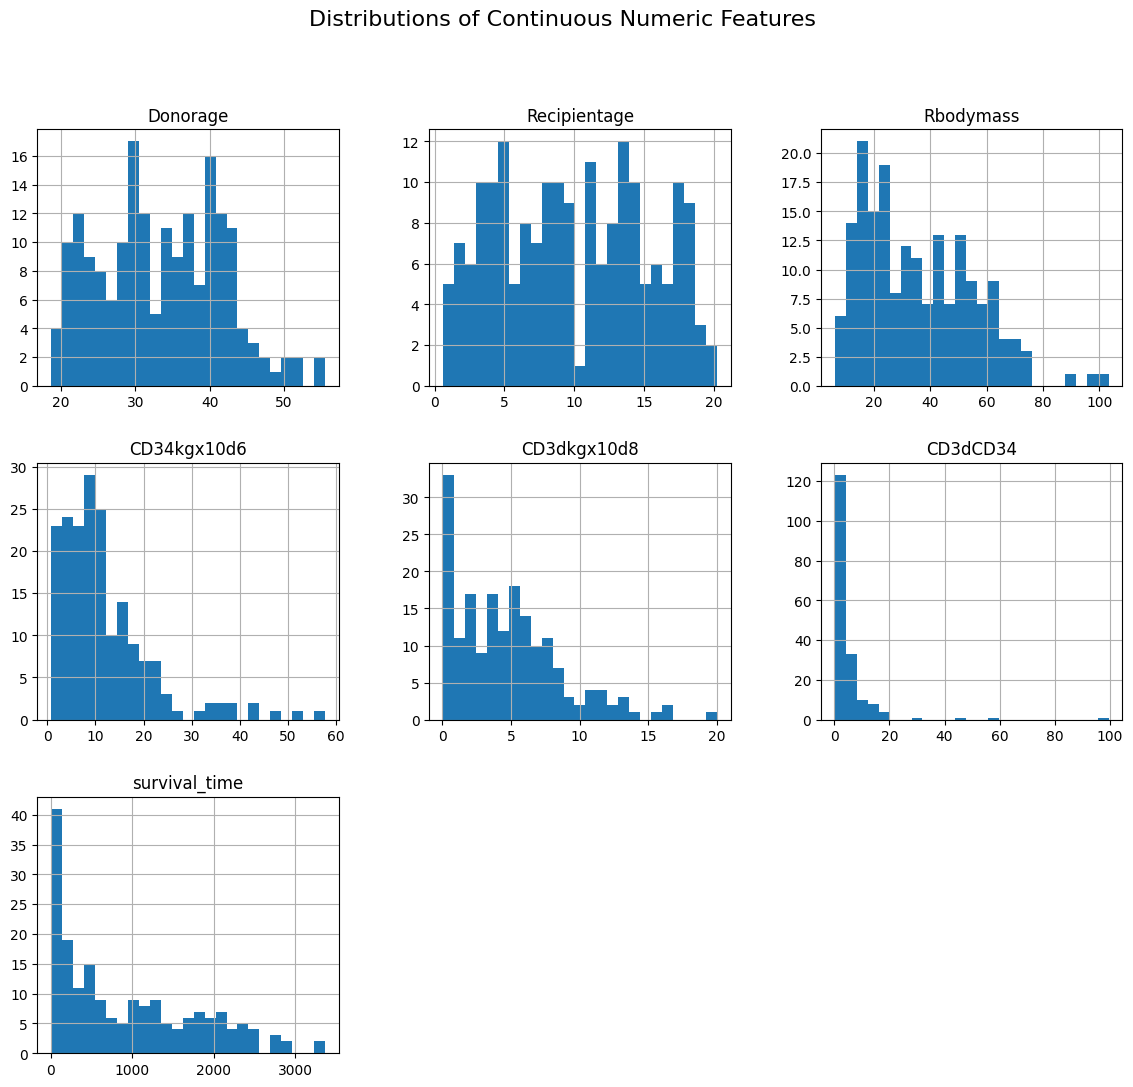

In [ ]:
# Plot histograms for continuous numeric features
df_numeric.hist(figsize=(14, 12), bins=25)
plt.suptitle("Distributions of Continuous Numeric Features", fontsize=16)
plt.show()

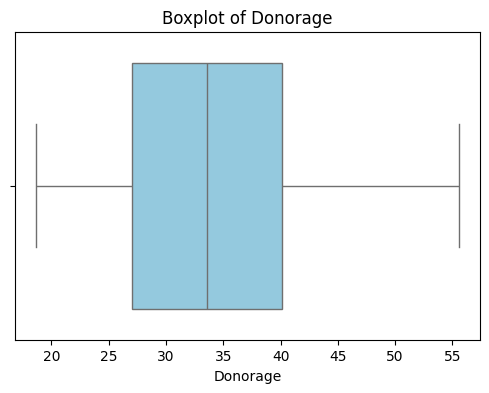

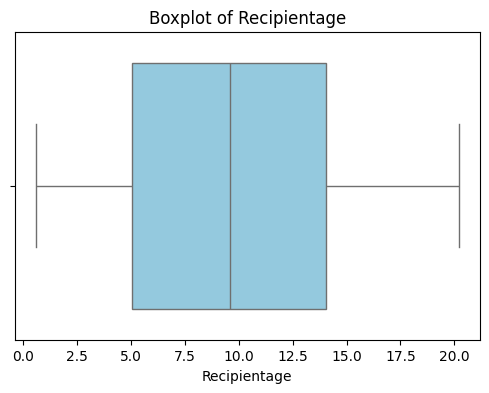

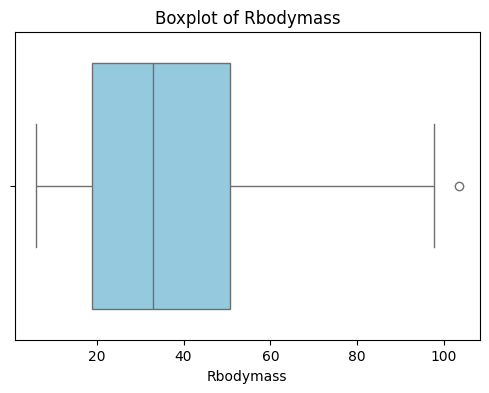

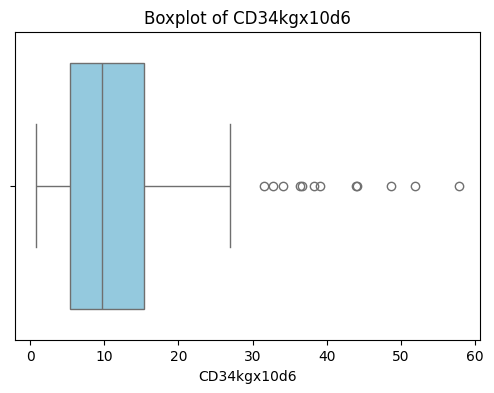

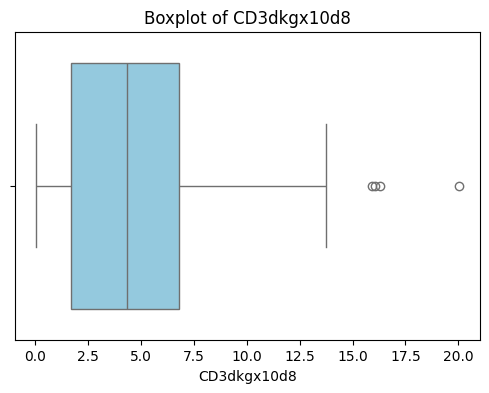

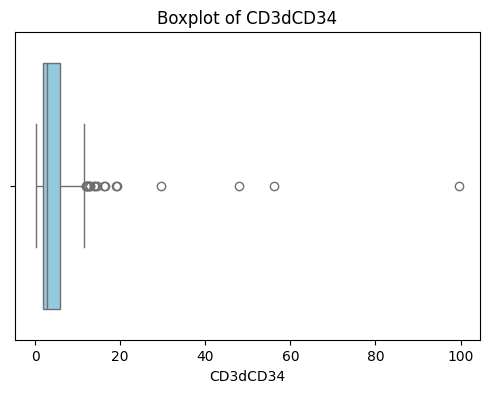

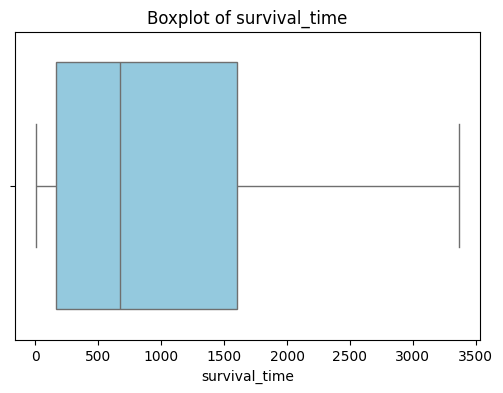

In [ ]:
# Boxplots for numeric features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


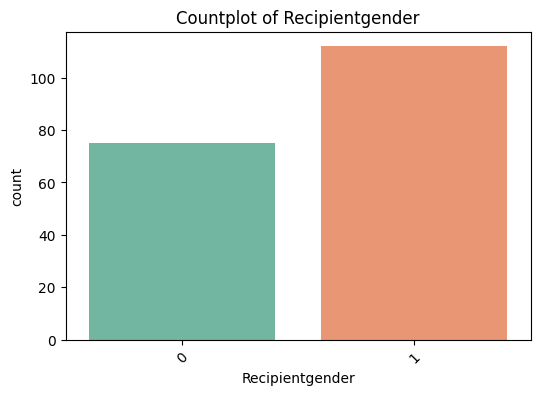

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


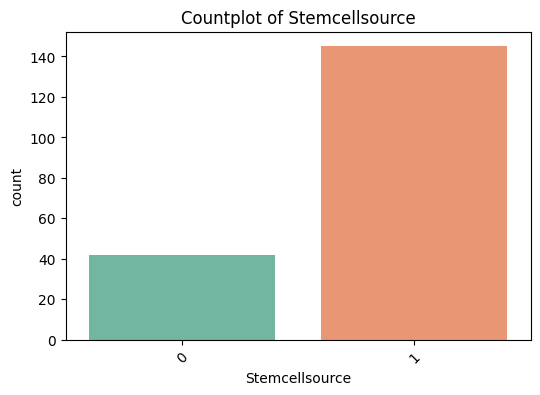

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


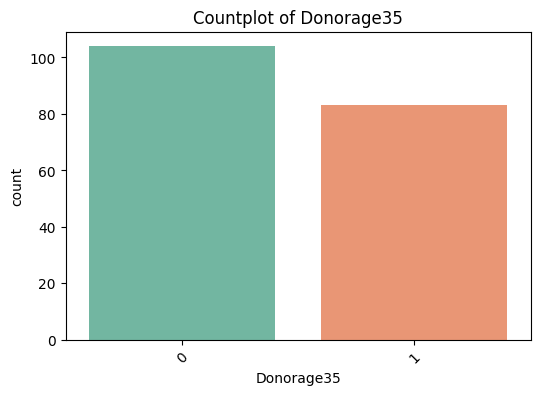

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


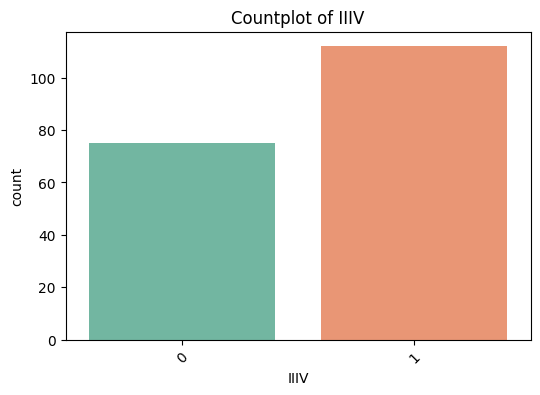

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


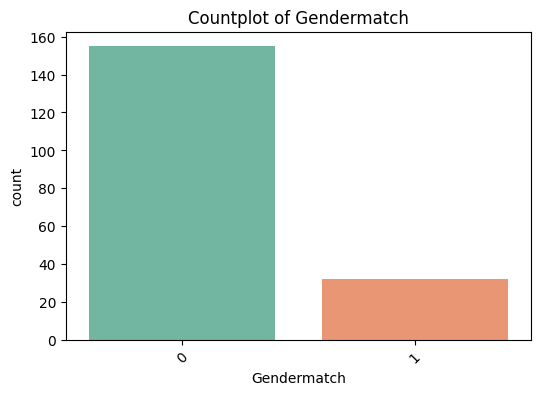

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


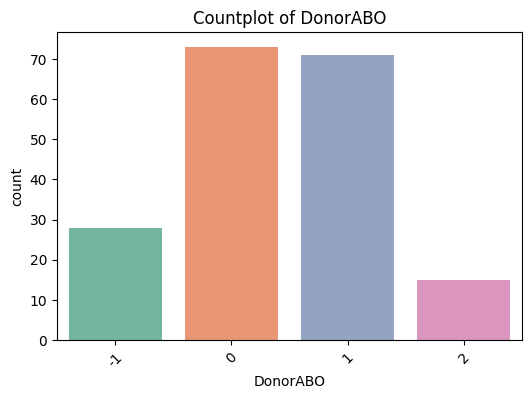

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


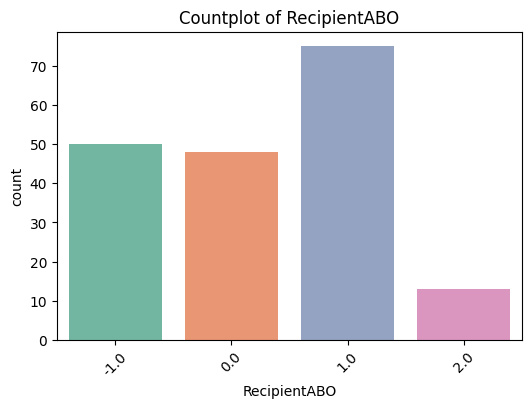

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


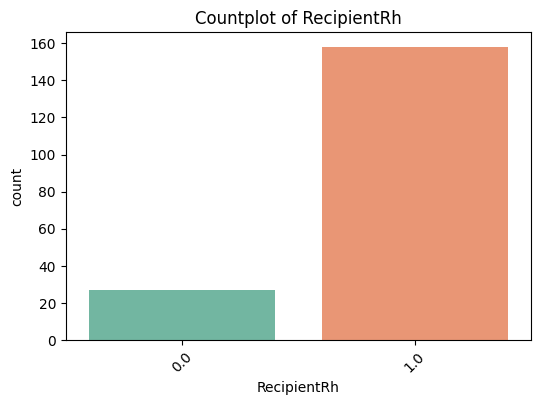

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


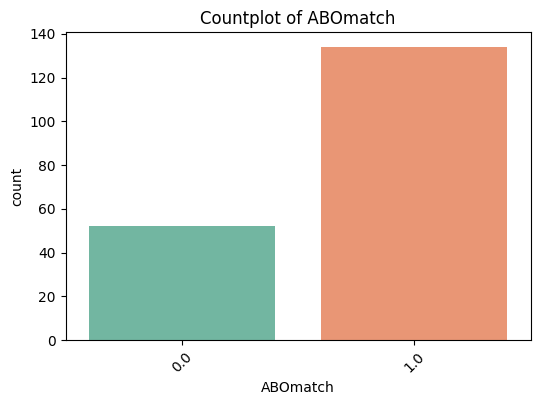

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


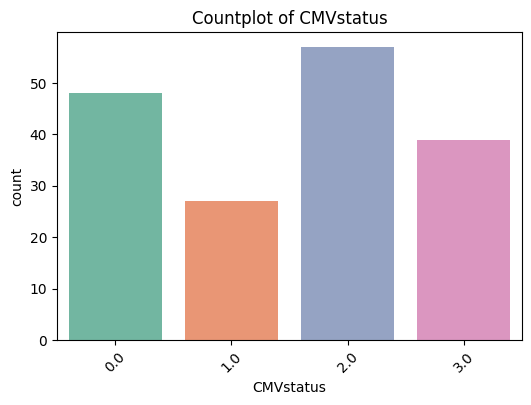

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


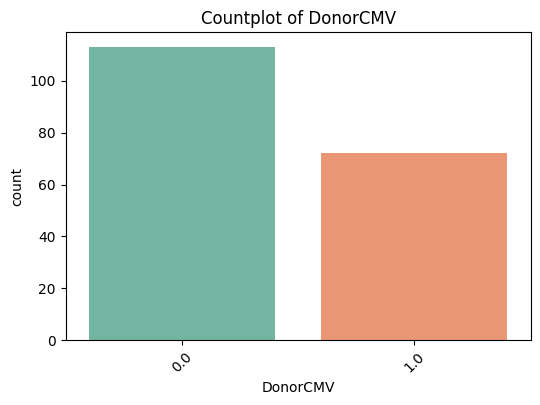

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


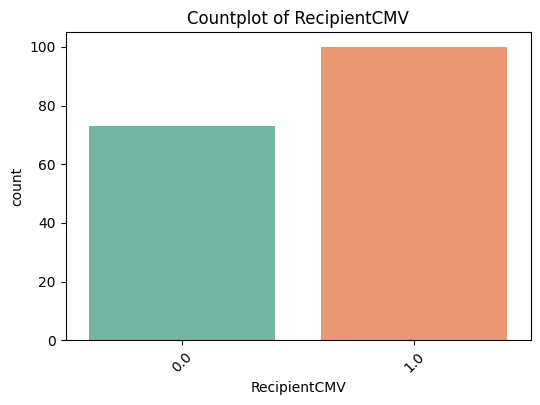

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


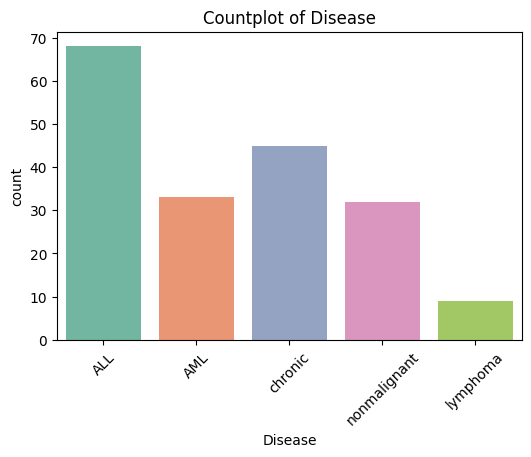

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


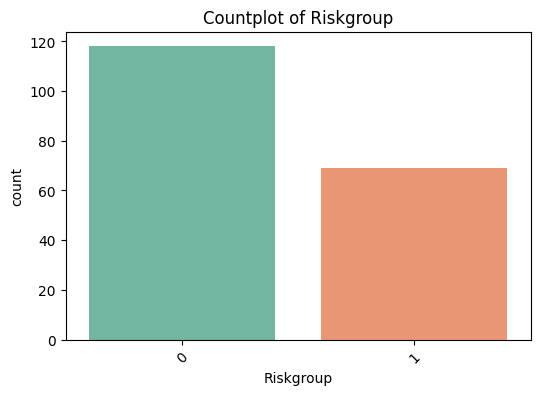

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


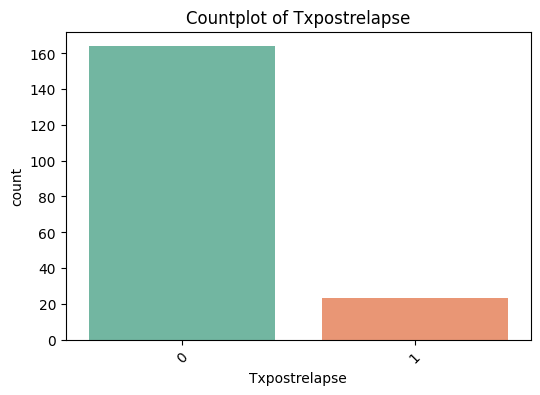

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


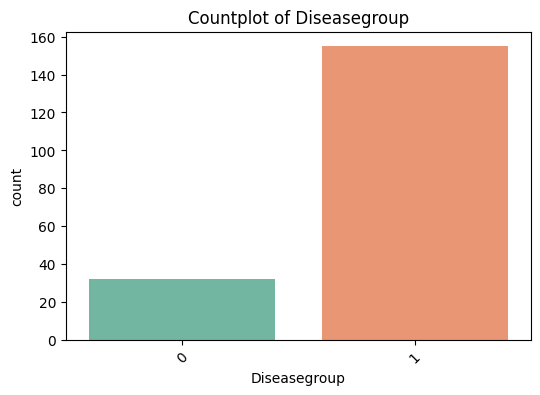

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


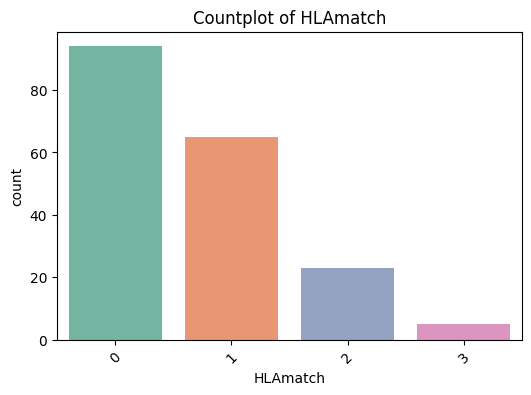

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


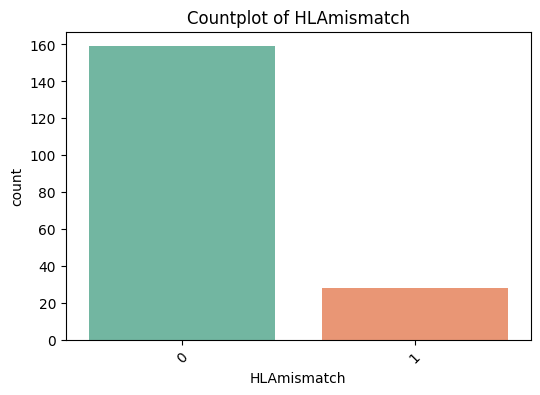

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


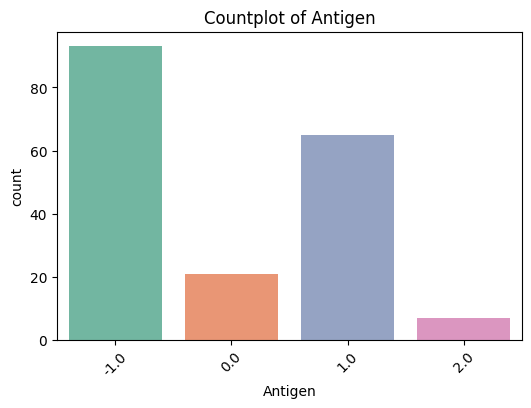

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


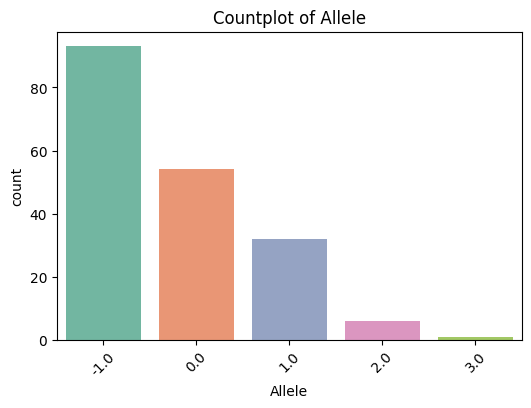

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


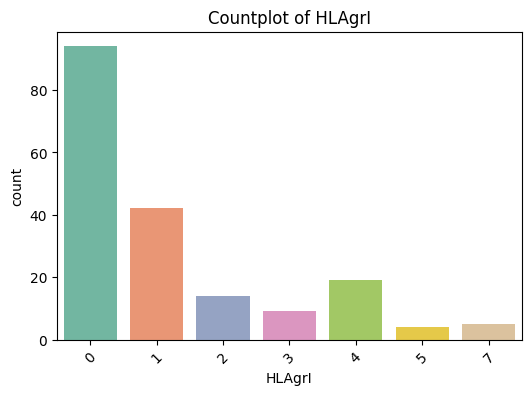

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


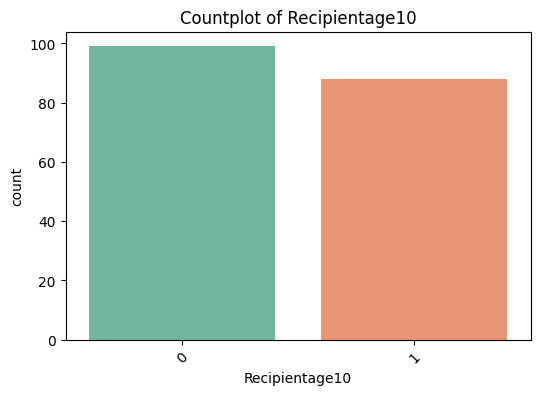

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


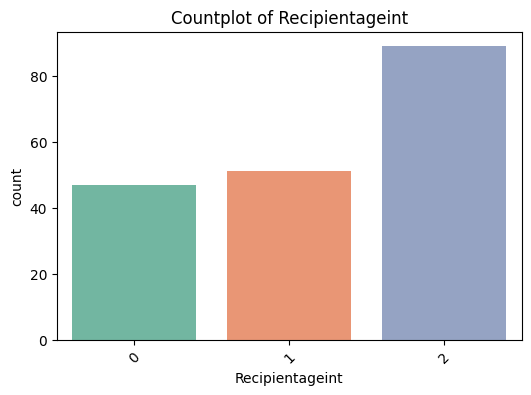

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


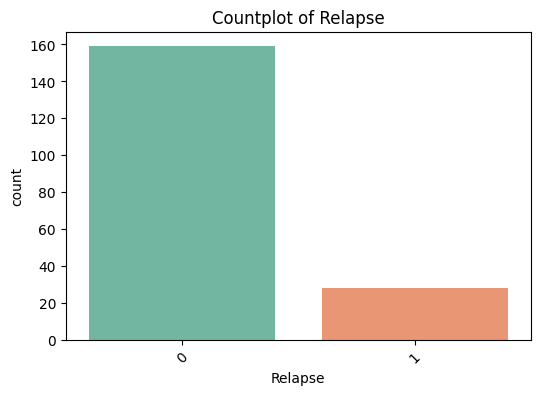

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


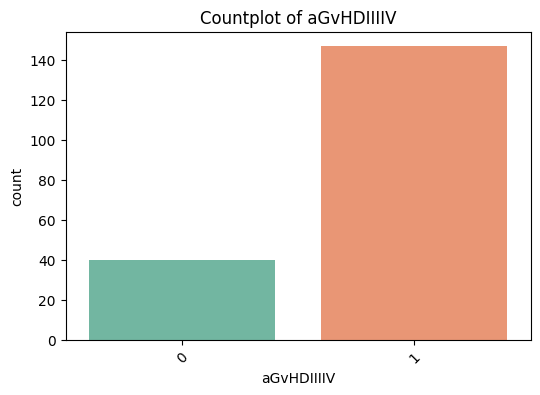

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


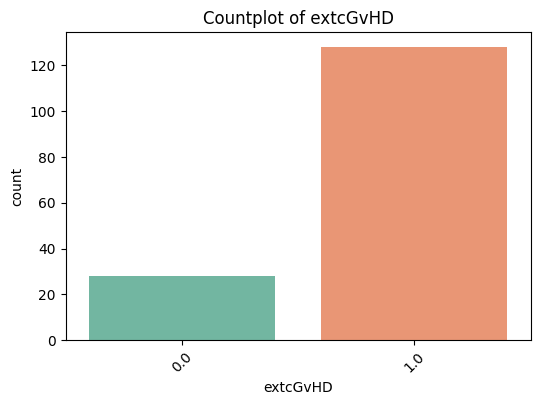

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


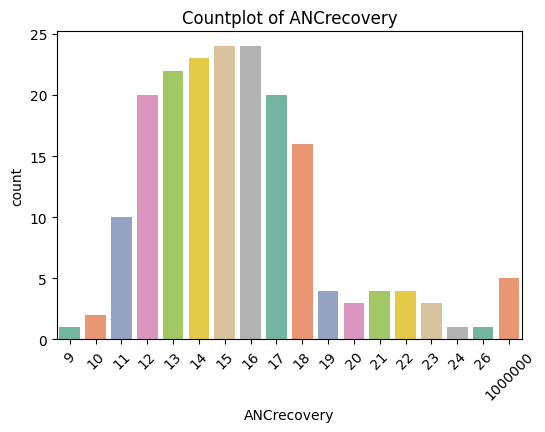

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


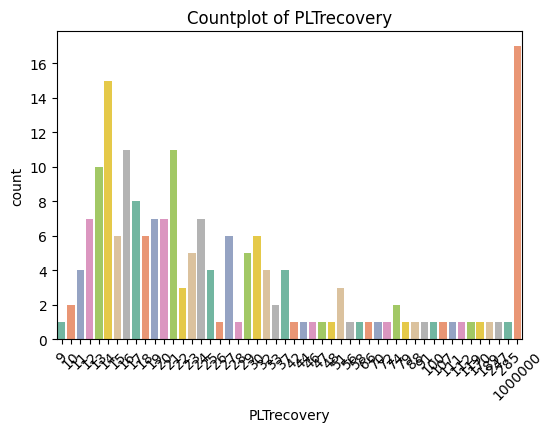

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


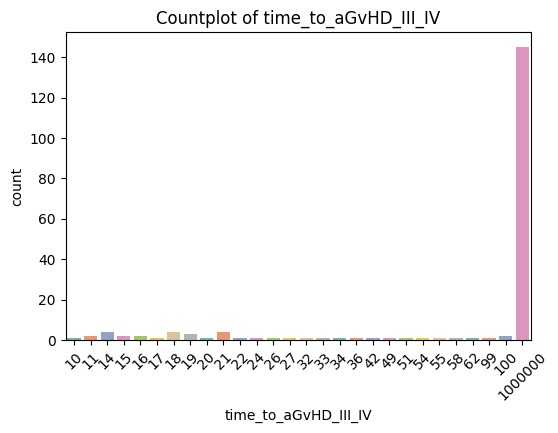

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


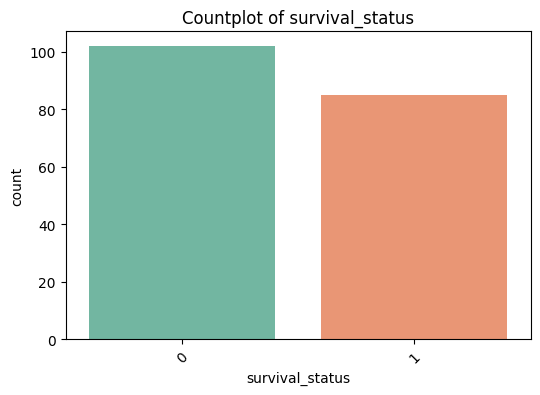

In [ ]:
# Categorical distributions
categorical_features = [col for col in df.columns if col not in numeric_features]
# Countplots for categorical/binary features
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

#**MISSING VALUES**

In [84]:
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Missing values:
 extcGvHD                31
CMVstatus               16
RecipientCMV            14
CD3dCD34                 5
CD3dkgx10d8              5
RecipientRh              2
Rbodymass                2
DonorCMV                 2
RecipientABO             1
Allele                   1
ABOmatch                 1
Antigen                  1
Recipientgender          0
IIIV                     0
Donorage35               0
Donorage                 0
Stemcellsource           0
DonorABO                 0
Gendermatch              0
Disease                  0
Riskgroup                0
HLAmatch                 0
HLAmismatch              0
Txpostrelapse            0
Diseasegroup             0
Recipientageint          0
HLAgrI                   0
Recipientage10           0
Recipientage             0
CD34kgx10d6              0
aGvHDIIIIV               0
Relapse                  0
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
survival_s

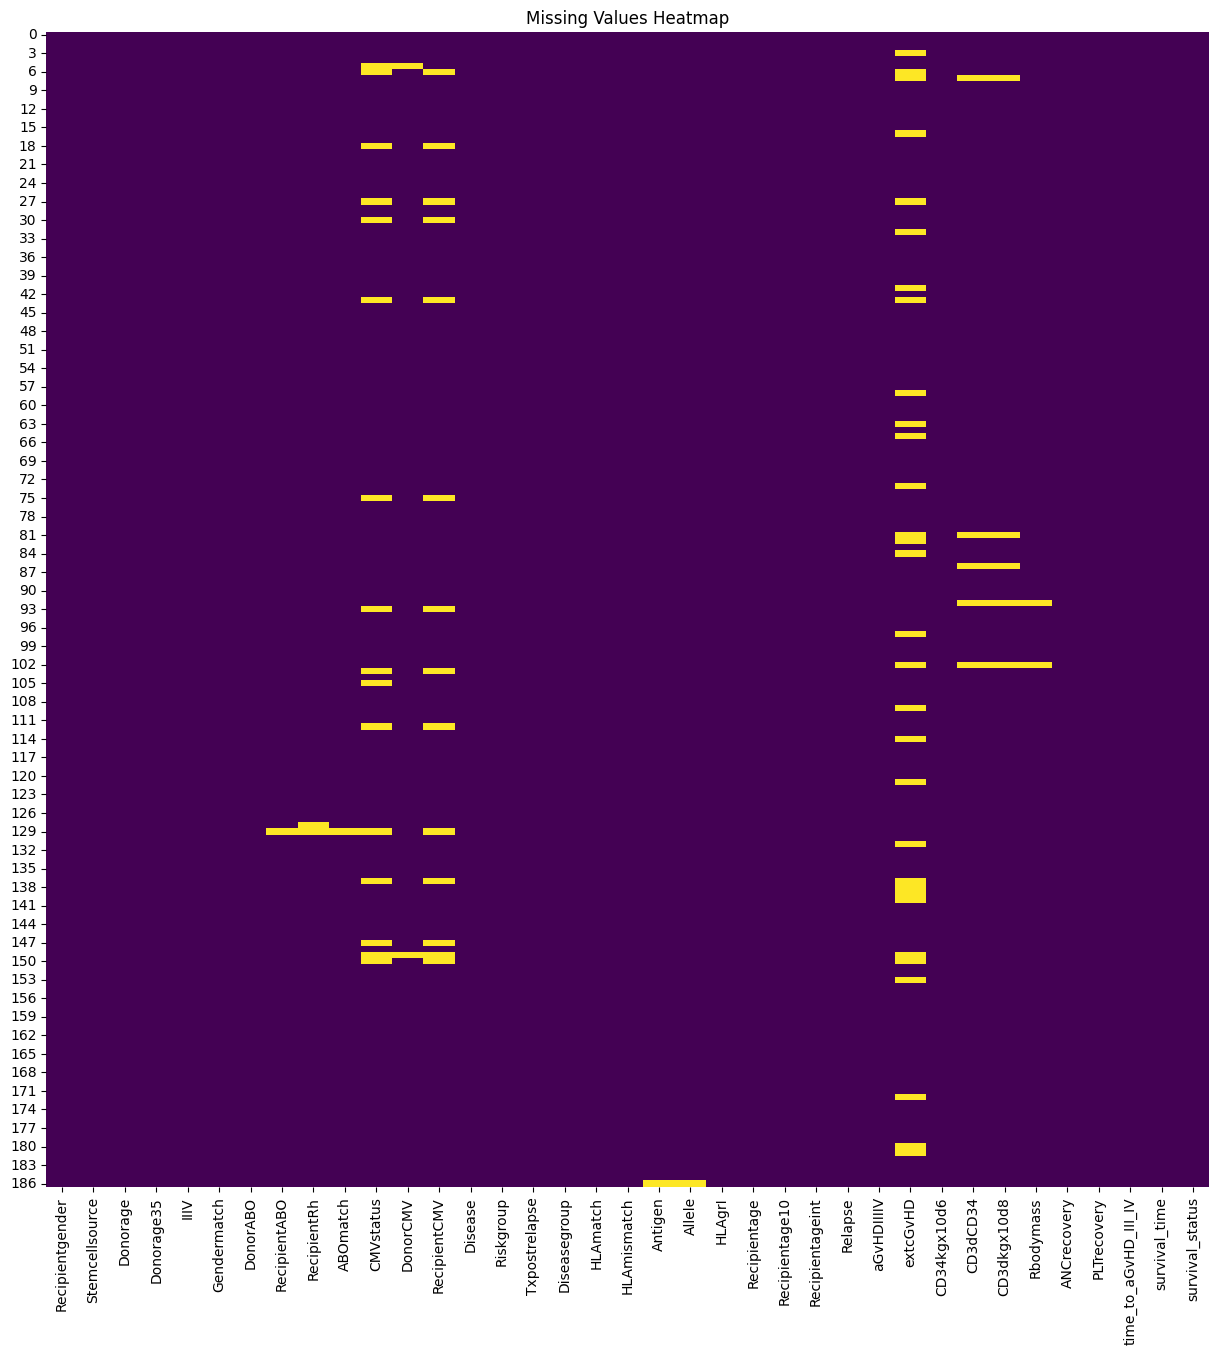

In [83]:
# Missing values heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

#**CORRELATIONS**

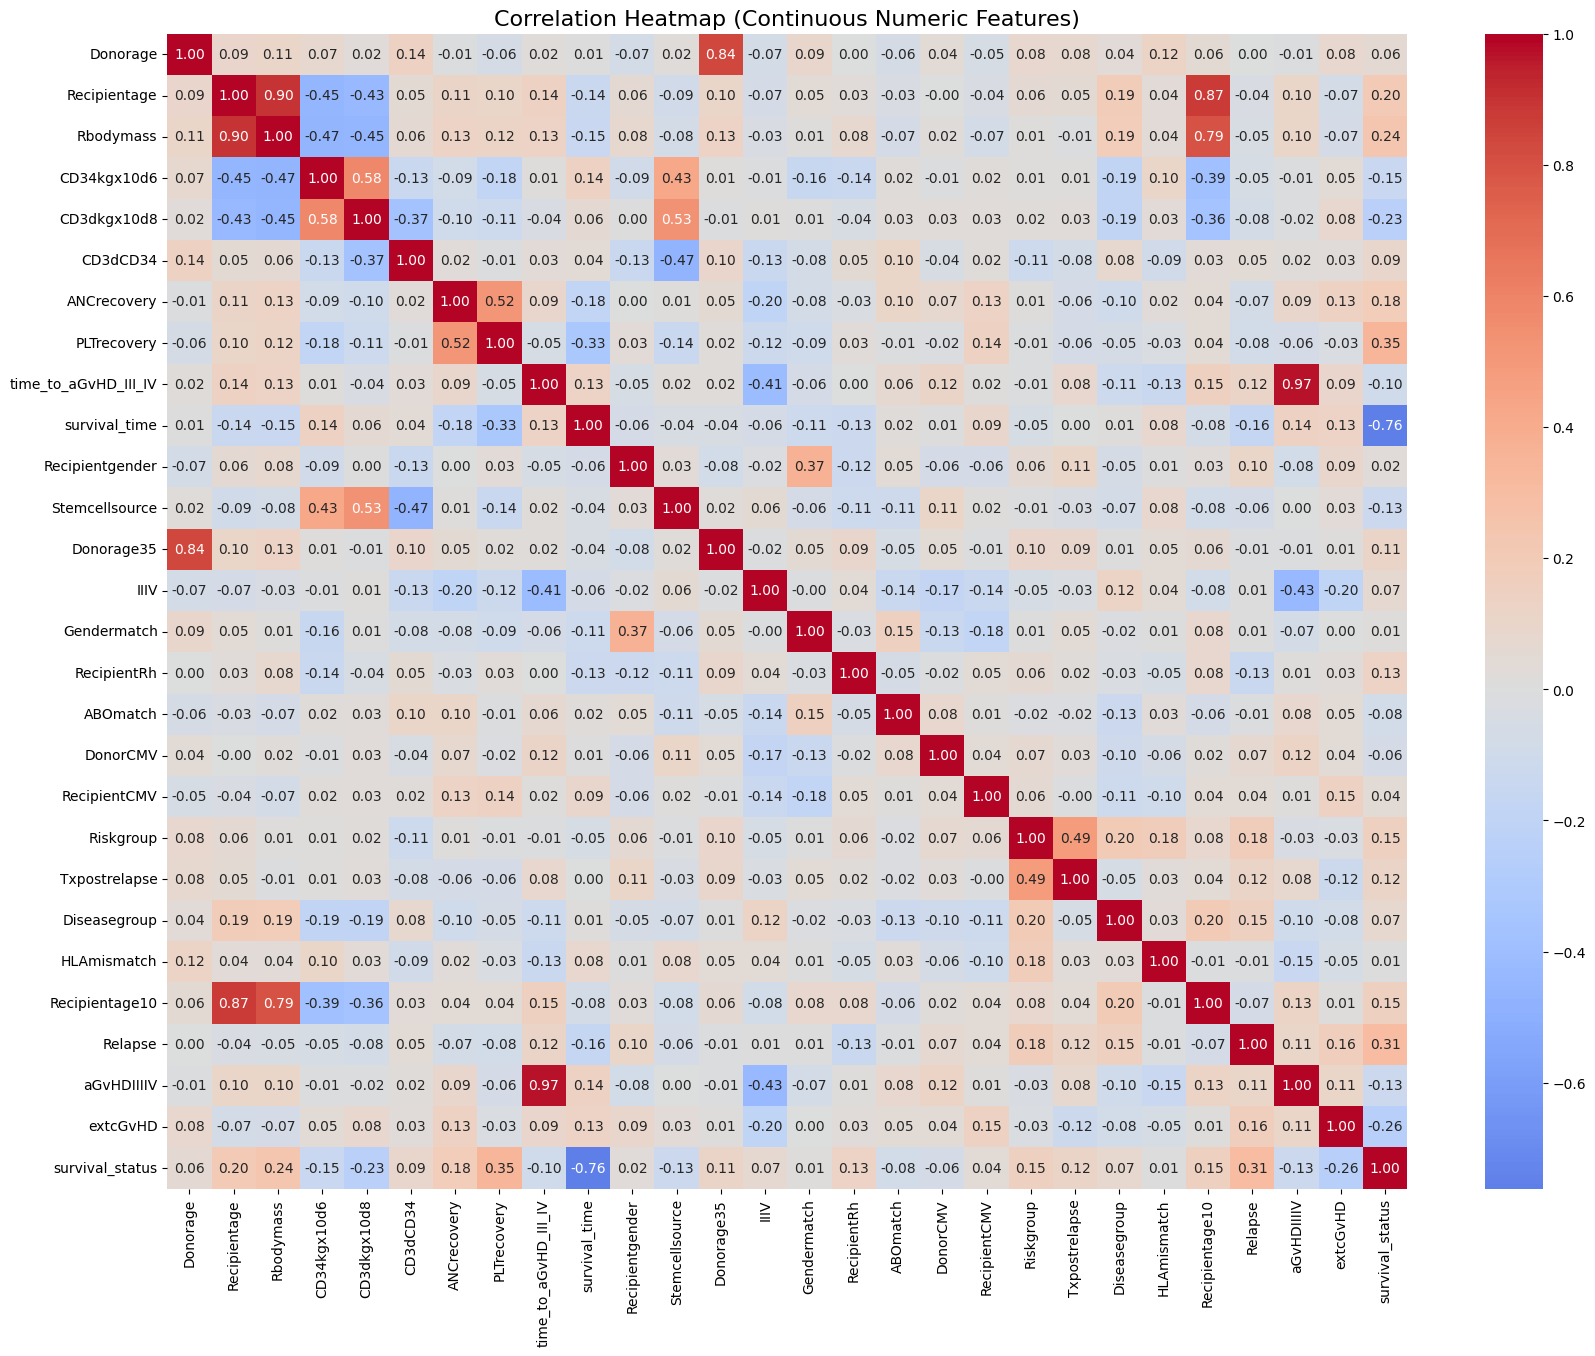

In [71]:
# Correlation analysis for numeric and binary features
numeric_binary_features = [
    "Donorage","Recipientage","Rbodymass","CD34kgx10d6","CD3dkgx10d8","CD3dCD34",
    "ANCrecovery","PLTrecovery","time_to_aGvHD_III_IV" ,"survival_time",
    "Recipientgender", "Stemcellsource", "Donorage35", "IIIV", "Gendermatch",
    "RecipientRh","ABOmatch","DonorCMV","RecipientCMV","Riskgroup","Txpostrelapse",
    "Diseasegroup", "HLAmismatch", "Recipientage10", "Relapse", "aGvHDIIIIV",
    "extcGvHD","survival_status"
]

df_corr_num = df[numeric_binary_features]
plt.figure(figsize=(20,15))
corr_matrix = df_corr_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Correlation of numeric features with survival_status:

survival_status         1.000000
PLTrecovery             0.346395
Relapse                 0.309201
Rbodymass               0.238110
Recipientage            0.203406
ANCrecovery             0.181569
Recipientage10          0.150616
Riskgroup               0.147706
RecipientRh             0.126630
Txpostrelapse           0.115936
Donorage35              0.113976
CD3dCD34                0.089868
Diseasegroup            0.072587
IIIV                    0.067730
Donorage                0.060384
RecipientCMV            0.038908
Recipientgender         0.023905
Gendermatch             0.012962
HLAmismatch             0.008209
DonorCMV               -0.059941
ABOmatch               -0.084642
time_to_aGvHD_III_IV   -0.100601
aGvHDIIIIV             -0.126190
Stemcellsource         -0.126335
CD34kgx10d6            -0.146653
CD3dkgx10d8            -0.232331
extcGvHD               -0.256581
survival_time          -0.761462
Name: survival_statu

/tmp/ipython-input-1402382789.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="viridis")


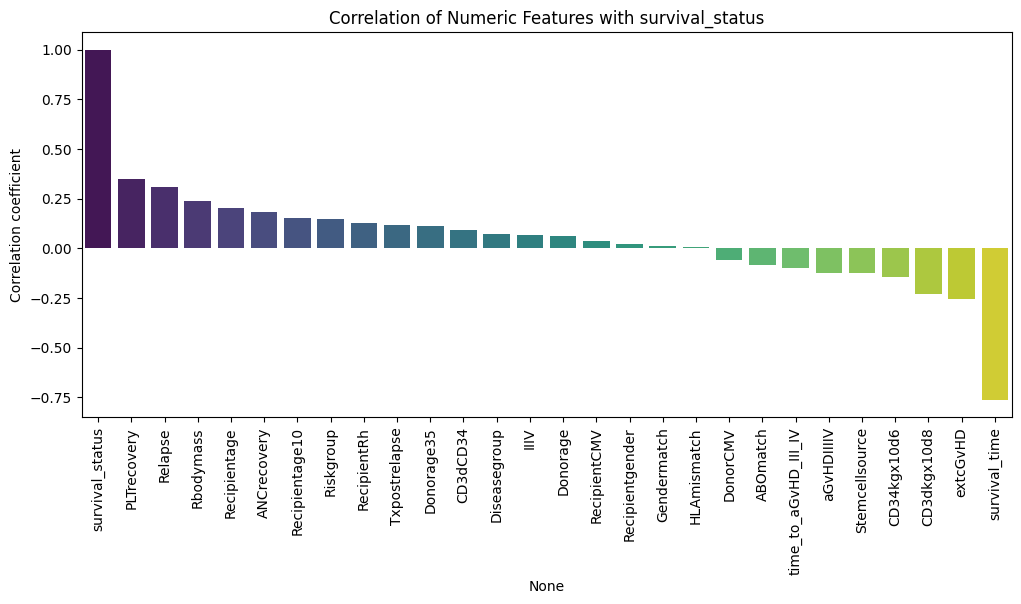

In [74]:
# Bar chart of correlation of numeric and binary features with survival_status
target_corr = corr_matrix["survival_status"].sort_values(ascending=False)
print("\nCorrelation of numeric and binary features with survival_status:\n")
print(target_corr)

plt.figure(figsize=(12,5))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Correlation coefficient")
plt.title("Correlation of Numeric and Binary Features with survival_status")
plt.show()

In [75]:
# Correlation between categorical and binary features
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / (min(k-1, r-1)))

categorical_binary_features = [
    "Donorage35","DonorABO","DonorCMV","Recipientage10","Recipientageint","Recipientgender",
    "RecipientABO","RecipientRh","RecipientCMV","Disease","Diseasegroup","IIIV","Gendermatch",
    "ABOmatch","CMVstatus","HLAmatch","HLAmismatch","Antigen", "Allele","HLAgrI","Riskgroup","Stemcellsource",
    "Txpostrelapse","ANCrecovery","PLTrecovery","aGvHDIIIIV","extcGvHD",
    "Relapse"]

# Compute Cramér's V for all combinations
results = []
for f1, f2 in itertools.combinations(categorical_binary_features, 2):
    v = cramers_v(df[f1], df[f2])
    results.append({"Feature 1": f1, "Feature 2": f2, "Cramers_V": v})
# Convert results to DataFrame ---
cramers_df = pd.DataFrame(results)
# Sort by strongest association ---
cramers_df_sorted = cramers_df.sort_values(by="Cramers_V", ascending=False)
# Display top 10 strongest associations ---
print(cramers_df_sorted.head(30))

           Feature 1        Feature 2  Cramers_V
314      HLAmismatch           HLAgrI   1.000000
303         HLAmatch           HLAgrI   1.000000
207          Disease     Diseasegroup   1.000000
300         HLAmatch      HLAmismatch   1.000000
78    Recipientage10  Recipientageint   0.989331
64          DonorCMV        CMVstatus   0.987871
193     RecipientCMV        CMVstatus   0.976825
324          Antigen           HLAgrI   0.809709
302         HLAmatch           Allele   0.785958
333           Allele           HLAgrI   0.772270
323          Antigen           Allele   0.696596
359   Stemcellsource      PLTrecovery   0.663242
301         HLAmatch          Antigen   0.648766
313      HLAmismatch           Allele   0.642460
364    Txpostrelapse      PLTrecovery   0.626430
269      Gendermatch      PLTrecovery   0.616328
368      ANCrecovery      PLTrecovery   0.614617
98    Recipientage10      PLTrecovery   0.607591
353        Riskgroup      PLTrecovery   0.596034
312      HLAmismatch

In [76]:
# Compute Cramér's V of categorical with survival_status
results = []
for col in categorical_binary_features:
    v = cramers_v(df[col], df["survival_status"])
    results.append({"Feature": col, "Cramers_V_with_survival": v})

# Convert results to DataFrame ---
cramers_target_df = pd.DataFrame(results)
# Sort by strongest association ---
cramers_target_df_sorted = cramers_target_df.sort_values(by="Cramers_V_with_survival", ascending=False)
# Display results ---
print(cramers_target_df_sorted.head(10))

            Feature  Cramers_V_with_survival
24      PLTrecovery                 0.647771
23      ANCrecovery                 0.394918
27          Relapse                 0.294151
9           Disease                 0.251788
26         extcGvHD                 0.239025
4   Recipientageint                 0.145376
3    Recipientage10                 0.139858
20        Riskgroup                 0.136577
1          DonorABO                 0.126719
21   Stemcellsource                 0.113468


In [80]:
# Correlation between categorical and numeric features
from scipy.stats import f_oneway

numeric_features = [
    "Donorage", "Recipientage", "Rbodymass", "CD34kgx10d6", "CD3dkgx10d8",
    "CD3dCD34", "time_to_aGvHD_III_IV", "survival_time"
]

categorical_features = [
    "DonorABO", "Recipientageint", "RecipientABO", "Disease",
    "CMVstatus", "HLAmatch", "Antigen", "Allele", "HLAgrI",
    "ANCrecovery", "PLTrecovery"
]

results = []

for num_col in numeric_features:
    for cat_col in categorical_features:
        try:
            groups = [df[df[cat_col] == cat][num_col].dropna() for cat in df[cat_col].dropna().unique()]
            if len(groups) >= 2 and all(len(g) > 1 for g in groups):
                f_stat, p_val = f_oneway(*groups)
                results.append((num_col, cat_col, f_stat, p_val))
        except Exception as e:
            pass  # skip problematic pairs

# Sort results by p-value
results_sorted = sorted(results, key=lambda x: x[3])

# Print nicely
for num_col, cat_col, f_stat, p_val in results_sorted:
    print(f"{num_col} vs {cat_col} → p-value: {p_val:.4f}")

Recipientage vs Recipientageint → p-value: 0.0000
Rbodymass vs Recipientageint → p-value: 0.0000
CD34kgx10d6 vs Recipientageint → p-value: 0.0000
CD3dkgx10d8 vs Recipientageint → p-value: 0.0000
Recipientage vs Disease → p-value: 0.0011
Rbodymass vs Antigen → p-value: 0.0021
Donorage vs HLAgrI → p-value: 0.0069
CD34kgx10d6 vs DonorABO → p-value: 0.0106
Recipientage vs Antigen → p-value: 0.0182
Rbodymass vs Disease → p-value: 0.0272
time_to_aGvHD_III_IV vs RecipientABO → p-value: 0.0376
survival_time vs Disease → p-value: 0.0398
Donorage vs HLAmatch → p-value: 0.0410
time_to_aGvHD_III_IV vs Disease → p-value: 0.0475
Donorage vs Antigen → p-value: 0.0485
CD34kgx10d6 vs Disease → p-value: 0.0747
CD3dkgx10d8 vs Disease → p-value: 0.0857
CD34kgx10d6 vs RecipientABO → p-value: 0.1027
time_to_aGvHD_III_IV vs DonorABO → p-value: 0.1064
time_to_aGvHD_III_IV vs Recipientageint → p-value: 0.1067
CD3dCD34 vs DonorABO → p-value: 0.1107
CD3dkgx10d8 vs RecipientABO → p-value: 0.1117
time_to_aGvHD_III